In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1505 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5090087  0.50508714 0.57567537]
  [0.45982593 0.45590436 0.5264926 ]
  [0.5063569  0.5024353  0.57302356]
  ...
  [0.4999612  0.49603963 0.5587847 ]
  [0.49865735 0.49473578 0.55748093]
  [0.4973535  0.49343193 0.556177  ]]

 [[0.5088638  0.50494224 0.5755305 ]
  [0.4621439  0.45822233 0.52881056]
  [0.50360435 0.49968272 0.570271  ]
  ...
  [0.51003325 0.5061117  0.5688568 ]
  [0.5110474  0.5071258  0.56987095]
  [0.5120615  0.5081399  0.570885  ]]

 [[0.50871897 0.5047974  0.57538563]
  [0.46446186 0.4605403  0.5311285 ]
  [0.50085175 0.49693018 0.56751835]
  ...
  [0.52330947 0.5193879  0.582133  ]
  [0.5235992  0.51967764 0.58242273]
  [0.523889   0.51996744 0.58271253]]

 ...

 [[0.6250492  0.62897074 0.7074021 ]
  [0.62461454 0.6285361  0.70696753]
  [0.62417996 0.6281015  0.7065329 ]
  ...
  [0.7686275  0.76470596 0.8196079 ]
  [0.777329   0.77340746 0.8283094 ]
  [0.79131997 0.7873984  0.84230036]]

 [[0.6156863  0.61960787 0.69803923]
  [0.6156863  0.61960787 0.69803923]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 214 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 432 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch)
    break

[[[[0.7464525  0.7072368  0.7386094 ]
   [0.7453552  0.7061395  0.73751205]
   [0.7442578  0.7050421  0.7364147 ]
   ...
   [0.6401609  0.5926295  0.618356  ]
   [0.6557788  0.60479844 0.6322494 ]
   [0.6670709  0.61609054 0.6435415 ]]

  [[0.7668739  0.7276582  0.75903076]
   [0.7639476  0.7247319  0.75610447]
   [0.7610213  0.72180563 0.7531782 ]
   ...
   [0.64162403 0.5933611  0.6194534 ]
   [0.657242   0.6062616  0.6337126 ]
   [0.6678025  0.6168221  0.6442731 ]]

  [[0.7705179  0.73647565 0.7661237 ]
   [0.7734442  0.73830456 0.7683184 ]
   [0.77637047 0.7401335  0.7705131 ]
   ...
   [0.6430872  0.5940926  0.6205507 ]
   [0.6587051  0.60772467 0.6351757 ]
   [0.6685341  0.6175537  0.6450047 ]]

  ...

  [[0.5732965  0.5497671  0.5968259 ]
   [0.61657786 0.59304845 0.6401073 ]
   [0.6147936  0.5912642  0.638323  ]
   ...
   [0.5768212  0.5552276  0.58367145]
   [0.5870632  0.564738   0.59354764]
   [0.59730524 0.57424843 0.6034239 ]]

  [[0.57914907 0.55561966 0.6026785 ]
   [0.6

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\vikra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20


c:\Users\vikra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.4939 - loss: 0.9640 - val_accuracy: 0.6458 - val_loss: 0.8151
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:20 2s/step - accuracy: 0.7500 - loss: 0.7382

c:\Users\vikra\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7500 - loss: 0.7382 - val_accuracy: 0.7273 - val_loss: 0.7999
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6031 - loss: 0.7426 - val_accuracy: 0.7292 - val_loss: 0.5716
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7812 - loss: 0.4572 - val_accuracy: 0.8182 - val_loss: 0.4392
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.7884 - loss: 0.4639 - val_accuracy: 0.6042 - val_loss: 0.8122
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7188 - loss: 0.6312 - val_accuracy: 0.8182 - val_loss: 0.5287
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.7750 - loss: 0.4896 - val_accuracy: 0.8229 - val_loss: 0.4079
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8438 - loss: 0.3457 - val_accuracy: 0.9545 - val_loss: 0.2722
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8032 - loss: 0.4430 - val_accuracy: 0.8750 - val_loss: 0.328

In [18]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8804 - loss: 0.3227


In [19]:
scores

[0.3163325786590576, 0.8680555820465088]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.904443621635437,
 0.738240122795105,
 0.6721754670143127,
 0.4572136104106903,
 0.45803767442703247]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.6458333134651184,
 0.7272727489471436,
 0.7291666865348816,
 0.8181818127632141,
 0.6041666865348816,
 0.8181818127632141,
 0.8229166865348816,
 0.9545454382896423,
 0.875,
 0.8181818127632141,
 0.8802083134651184,
 0.9090909361839294,
 0.765625,
 0.5909090638160706,
 0.890625,
 0.9090909361839294,
 0.8645833134651184,
 0.8181818127632141,
 0.859375,
 0.8181818127632141]

In [28]:
acc

[0.4894772469997406,
 0.75,
 0.6544467210769653,
 0.78125,
 0.8024439811706543,
 0.71875,
 0.8119484186172485,
 0.84375,
 0.821452796459198,
 0.9375,
 0.8818737268447876,
 0.9375,
 0.8961303234100342,
 0.78125,
 0.8268839120864868,
 0.875,
 0.8778004050254822,
 0.84375,
 0.898845911026001,
 0.9375]

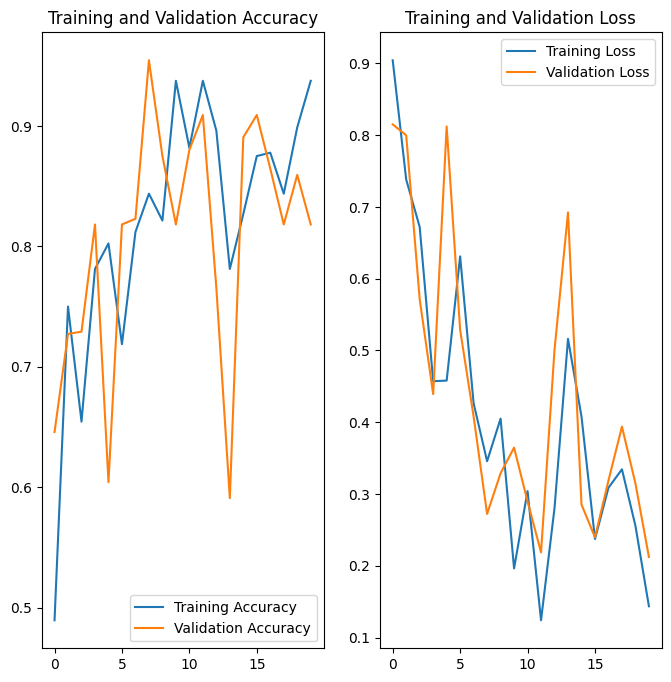

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
predicted label: Potato___Late_blight


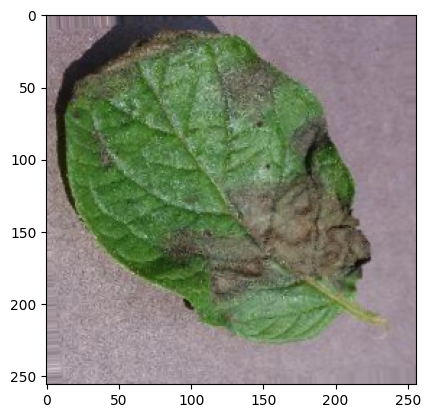

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


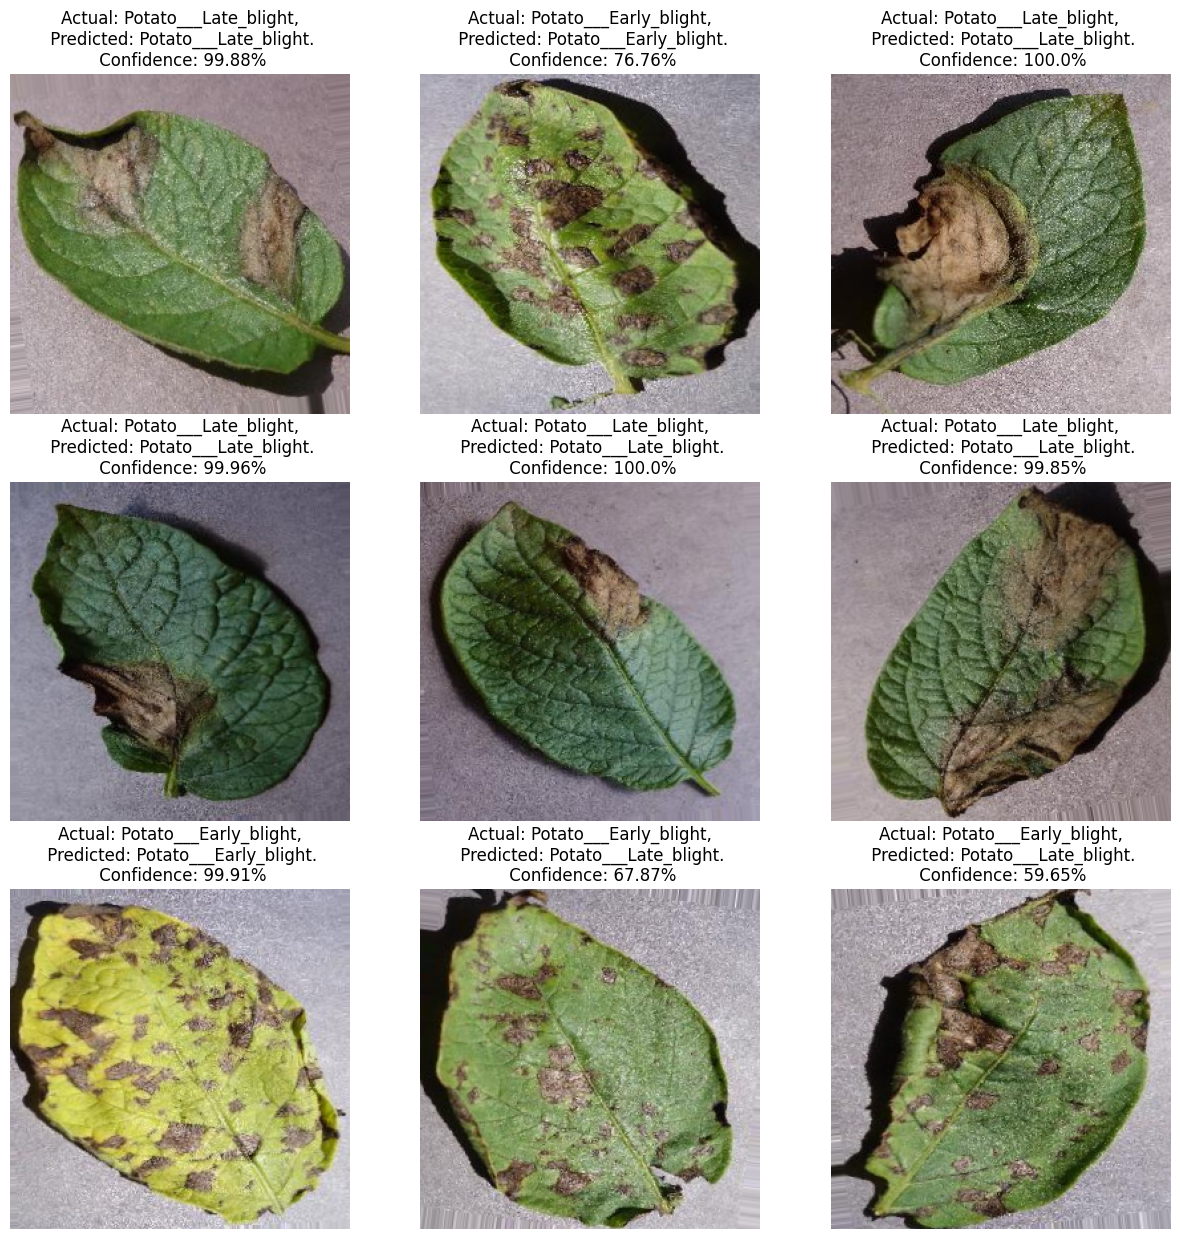

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [52]:
model.save("../potatoes.h5")
model.save("../potatoes.keras")

In [53]:
import os
os.makedirs("../saved_models/1", exist_ok=True)
model.save("../saved_models/1/potatoes.h5")